# Exercise : Try various CNN networks on MNIST dataset 
### Step By Step Process
- Lets Start working on this assignment and as we know the main objective of this assignmenst is to Try various CNN networks on MNIST dataset
- So in this assignment we will try CNN with different Models with different conv layers and with different kernels and in this we will also use dropouts and Batch Normalization. 
- Now lets start with Importing some important libraries and after this we will import our MNIST Data set.
- After loading MNIST Dataset with 100000 data points and then we will split our dataset into train and test and we know our dataset and after that we are doing something like 
> K.image_data_format() == 'channels_first'
- Let me explain you in brief -> 
    1. “keras.backend.image_data_format()” : Returns the default image data format convention.The image_data_format parameter affects how each of the backends treat the data dimensions when working with multi-dimensional convolution layers (such as Conv2D, Conv3D, Conv2DTranspose, Copping2D, … and any other 2D or 3D layer). Specifically, it defines where the ‘channels’ dimension is in the input data.
    2. And Both TensorFlow and Theano expects a four dimensional tensor as input. But where TensorFlow expects the ‘channels’ dimension as the last dimension (index 3, where the first is index 0) of the tensor – i.e. tensor with shape (samples, rows, cols, channels) – Theano will expect ‘channels’ at the second dimension (index 1) – i.e. tensor with shape (samples, channels, rows, cols). The outputs of the convolutional layers will also follow this pattern.

- And before we move to apply CNN lets try to normalize the data. 
- And as we know our class lables in this dataset is in numbers between {0,1,2,3......9} and now we will convert it into one hot encoded vector
- Now after doing all above lets start with our CNN models in this we will try various CNN networks on MNIST dataset.
- Here we will try conv with various layers and also with different kernel size and here we will also try dropout and Batch norm and In which as a Activation function we will use reLu and as a optimizer we will use adam and most important we will work with softmax classifier with multiple hidden layers that means we will works with softmax with multiple hidden layers and try to observe the performance by changing the no of layers with different kernel size and in this we will also work with dropout and batch normalization.
- And after doing all this we will try to observe the performance of train and test val so that we will be able to know our model should not overfit or underfit.

In [1]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# it defines where the ‘channels’ dimension is in the input data
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

C:\Users\nisha\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
# utility function 
def plt_dynamic_model(x, vy, ty):
    plt.figure(figsize=(10,5))
    plt.plot(x, vy, 'b', label="Val Loss")
    plt.plot(x, ty, 'r', label="Train Loss")
    plt.xlabel('Epochs') 
    plt.ylabel('Categorical Crossentropy Loss')
    plt.title('\nCategorical Crossentropy Loss VS Epochs')
    plt.legend()
    plt.show()

## 1. CNN with 3 conv layers and with (3X3) kernel size 


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5, 5, 128)         0         
__________

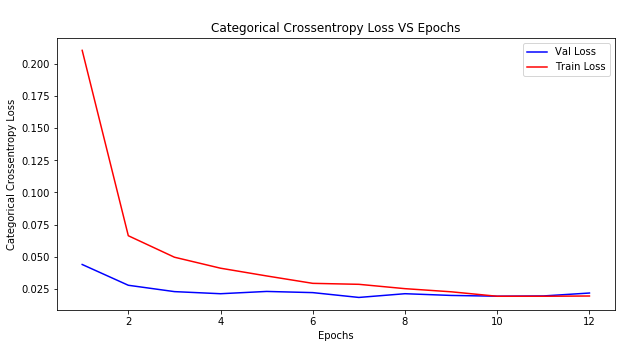

Test score: 0.02178811355105845
Test accuracy: 0.9933


In [3]:
model3 = Sequential()

model3.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(128, (3, 3), activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())

model3.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

print(model3.summary())
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

#--------------------------------------------------------------------plot--------------------------
x = list(range(1,epochs+1))
vy = history3.history['val_loss']
ty = history3.history['loss']

# function call
plt_dynamic_model(x, vy, ty)

model_score = model3.evaluate(x_test, y_test, verbose=0) 
print('Test score:', model_score[0]) 
print('Test accuracy:', model_score[1])

# saving accuracy of the model
model3_test_acc = model_score[1]
model3_train_acc = max(history3.history['acc'])

## 2. CNN with 5 conv layers and with  (5X5) kernel size 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 8)         208       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 16)        3216      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        12832     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 6, 6, 32)          0         
__________

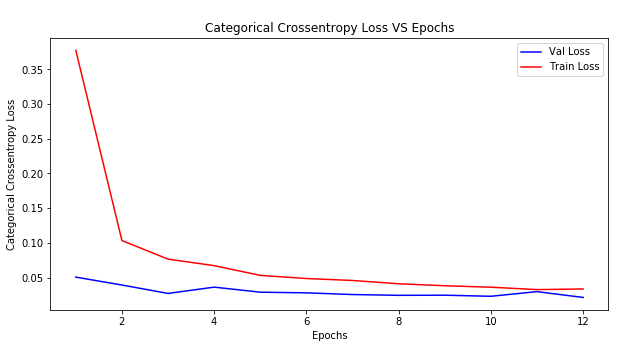

Test score: 0.021333325604430683
Test accuracy: 0.9936


In [4]:
model5 = Sequential()

model5.add(Conv2D(8, kernel_size=(5, 5),padding='same',activation='relu',input_shape=input_shape))

model5.add(Conv2D(16, (5, 5), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model5.add(Dropout(0.25))

model5.add(Conv2D(32, (5, 5),padding='same', activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model5.add(Dropout(0.25))

model5.add(Conv2D(64, (5, 5),padding='same',activation='relu'))

model5.add(Conv2D(64, (5, 5), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model5.add(Dropout(0.25))

model5.add(Flatten())
model5.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))

model5.add(Dense(num_classes, activation='softmax'))
print(model5.summary())
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history5 = model5.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

#--------------------------------------------------------------plot--------------------------
x = list(range(1,epochs+1))
vy = history5.history['val_loss']
ty = history5.history['loss']

# function call
plt_dynamic_model(x, vy, ty)

model_score = model5.evaluate(x_test, y_test, verbose=0) 
print('Test score:', model_score[0]) 
print('Test accuracy:', model_score[1])

# saving accuracy of the model 
model5_test_acc = model_score[1] 
model5_train_acc = max(history5.history['acc']) 

## 3. CNN with 7 conv layers and with  (2X2) kernel size 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 32)        160       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 27, 27, 32)        4128      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 25, 25, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25, 25, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        8256      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 64)        0         
__________

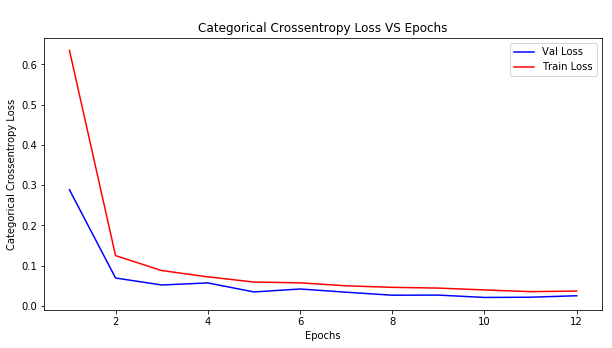

Test score: 0.024968813701119506
Test accuracy: 0.9927


In [5]:
model7 = Sequential()

model7.add(Conv2D(32, kernel_size=(2, 2),padding='same',activation='relu',input_shape=input_shape))

model7.add(Conv2D(32, (2, 2), activation='relu'))
model7.add(MaxPooling2D(pool_size=(3, 3), strides=(1,1)))
model7.add(Dropout(0.4))

model7.add(Conv2D(64, (2, 2), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2),padding='same'))
model7.add(Dropout(0.3))

model7.add(Conv2D(64, (2, 2),padding='same',activation='relu'))

model7.add(Conv2D(128, (2, 2), activation='relu'))
model7.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
model7.add(Dropout(0.25))

model7.add(Conv2D(128, (2, 2),padding='same',activation='relu'))

model7.add(Conv2D(256, (2, 2), activation='relu'))
model7.add(MaxPooling2D(pool_size=(2, 2), strides=(1,1)))
model7.add(Dropout(0.35))

model7.add(Flatten())

model7.add(Dense(256, activation='relu',kernel_initializer=he_normal(seed=None)))
model7.add(BatchNormalization())
model7.add(Dropout(0.5))

model7.add(Dense(128, activation='relu',kernel_initializer=he_normal(seed=None)))
model7.add(Dropout(0.25))

model7.add(Dense(num_classes, activation='softmax'))
print(model7.summary())
model7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history7 = model7.fit(x_train, y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

#--------------------------------------------------------------------plot--------------------------
x = list(range(1,epochs+1))
vy = history7.history['val_loss']
ty = history7.history['loss']

# function call
plt_dynamic_model(x, vy, ty)

model_score = model7.evaluate(x_test, y_test, verbose=0) 
print('Test score:', model_score[0]) 
print('Test accuracy:', model_score[1])

# saving accuracy of the model
model7_test_acc = model_score[1]
model7_train_acc = max(history7.history['acc'])

## Conclusion 

In [6]:
from prettytable import PrettyTable

print('Performance Table')
x = PrettyTable()
x.field_names =["Models","Train","Test"]

x.add_row(["CNN with 3 conv layers and with (3X3) kernel size",model3_train_acc,model3_test_acc])
x.add_row(["CNN with 5 conv layers and with (5X5) kernel size",model5_train_acc,model5_test_acc])
x.add_row(["CNN with 7 conv layers and with (2X2) kernel size",model7_train_acc,model7_test_acc])

print(x)

Performance Table
+---------------------------------------------------+--------------------+--------+
|                       Models                      |       Train        |  Test  |
+---------------------------------------------------+--------------------+--------+
| CNN with 3 conv layers and with (3X3) kernel size | 0.9942833333333333 | 0.9933 |
| CNN with 5 conv layers and with (5X5) kernel size | 0.9911166666666666 | 0.9936 |
| CNN with 7 conv layers and with (2X2) kernel size | 0.9895666666666667 | 0.9927 |
+---------------------------------------------------+--------------------+--------+
